4.1表的加减法  
4.1.1 什么是集合运算  
4.1.2 表的加法–UNION  
4.1.2.1 UNION  
4.1.2.2UNION 与 OR 谓词    
4.1.2.3 包含重复行的集合运算 UNION ALL  
4.1.2.4[扩展阅读]bag 模型与 set 模型  
4.1.2.5隐式类型转换  
4.1.3 MySQL 8.0 不支持交运算INTERSECT  
4.1.3.1[扩展阅读]bag 的交运算  
4.1.4 差集,补集与表的减法  
4.1.4.1 MySQL 8.0 还不支持 EXCEPT 运算  
4.1.4.2 EXCEPT 与 NOT 谓词  
4.1.4.3EXCEPT ALL 与bag 的差   
4.1.4.4INTERSECT 与 AND 谓词  
4.1.5对称差     
4.1.5.1借助并集和差集迂回实现交集运算 INTERSECT  
4.2连结(JOIN)   
4.2.1 内连结(INNER JOIN)  
4.2.1.1 使用内连结从两个表获取信息  
4.2.1.2 结合 WHERE 子句使用内连结   
4.2.1.3结合 GROUP BY 子句使用内连结    
4.2.1.4自连结(SELF JOIN)   
4.2.1.5内连结与关联子查询     
4.2.1.6自然连结(NATURAL JOIN)    
4.2.1.7使用连结求交集  
4.2.2 外连结(OUTER JOIN)  
4.2.2.1 左连结与右连接    
4.2.2.2 使用左连结从两个表获取信息   
4.2.2.3结合 WHERE 子句使用左连结   
4.2.2.4在 MySQL 中实现全外连结   
4.2.3多表连结   
4.2.3.1 多表进行内连结   
4.2.3.2多表进行外连结   
4.2.4ON 子句进阶–非等值连结   
4.2.4.1非等值自左连结(SELF JOIN)   
4.2.5 交叉连结—— CROSS JOIN(笛卡尔积)   
4.2.5.1[扩展阅读]连结与笛卡儿积的关系   
4.2.6 连结的特定语法和过时语法
练习题   
4.1   
4.2   
4.3   
4.4   
4.5   
   
SQL训练营页面地址：https://tianchi.aliyun.com/specials/promotion/aicampsql   
天池龙珠计划训练营地址：https://tianchi.aliyun.com/specials/promotion/aicamps   

# 4.1表的加减法
## 4.1.1 什么是集合运算
`集合`在数学领域表示“各种各样的事物的总和”, 在数据库领域表示记录的集合. 具体来说,表、视图和查询的执行结果都是记录的集合, 其中的元素为表或者查询结果中的每一行。  

在标准 `SQL` 中, 分别对检索结果使用 `UNION`, `INTERSECT`, `EXCEPT` 来将检索结果进行并,交和差运算, 像`UNION`,`INTERSECT`, `EXCEPT`这种用来进行集合运算的运算符称为集合运算符。  

以下的文氏图展示了几种集合的基本运算.  
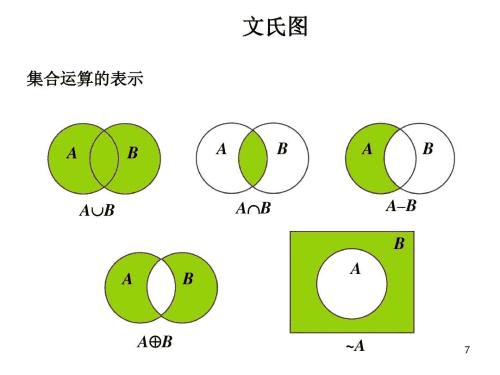  
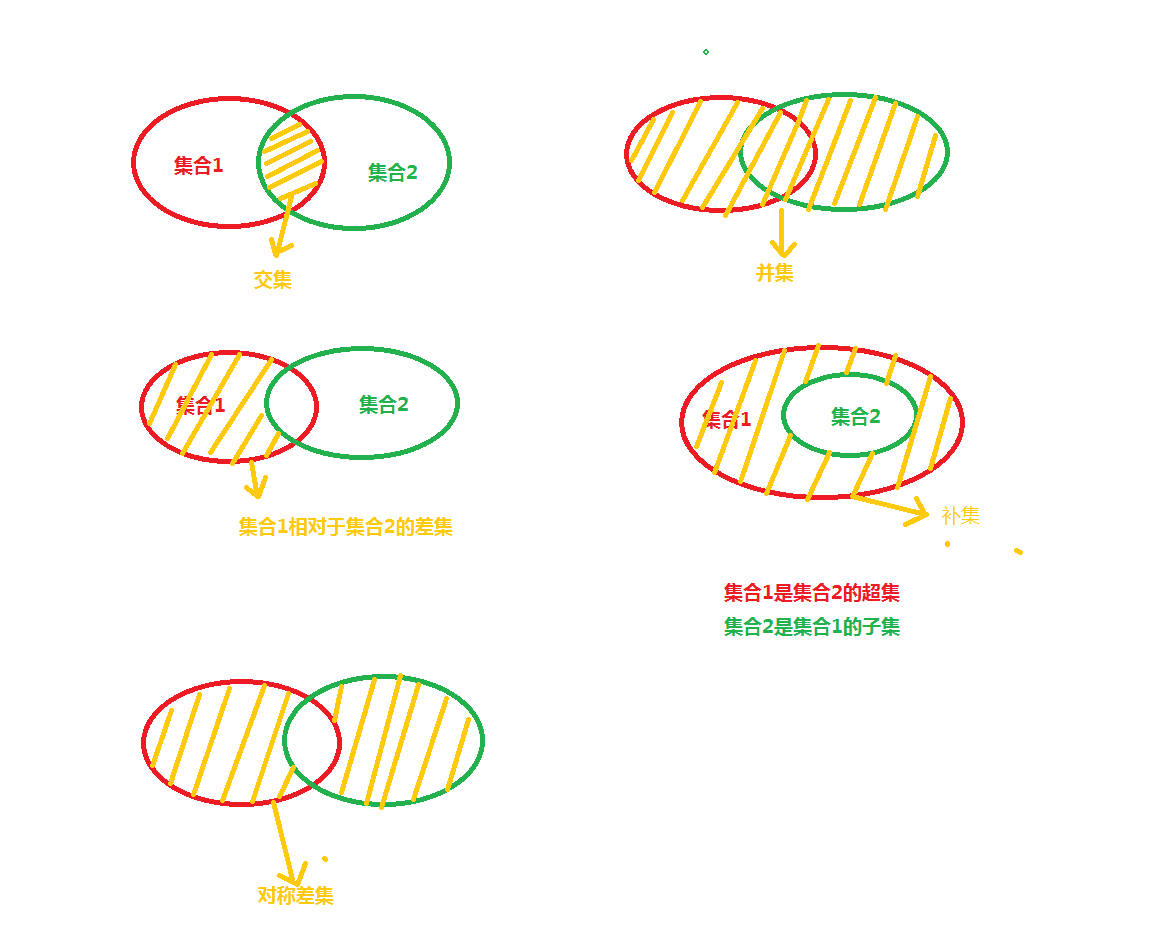  
在数据库中, 所有的表–以及查询结果–都可以视为集合, 因此也可以把表视为集合进行上述集合运算, 在很多时候, 这种抽象非常有助于对复杂查询问题给出一个可行的思路.  

## 4.1.2 表的加法–UNION
### 4.1.2.1 UNION
建表代码及数据导入请使用第一章提供的代码.  

接下来我们演示UNION的具体用法及查询结果:  

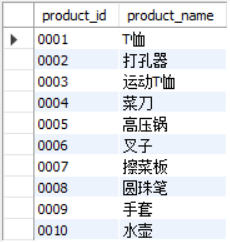

上述结果包含了两张表中的全部商品. 你会发现,这就是我们在学校学过的集合中的并集运算,通过文氏图会看得更清晰（图 7-1):  
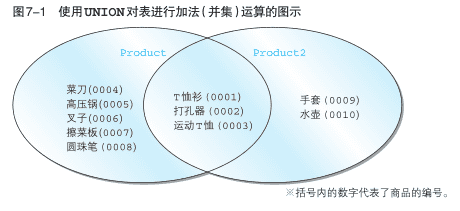  

通过观察可以发现,商品编号为“ 0001 ”~“ 0003 ”的 3 条记录在两个表中都存在,因此大家可能会认为结果中会出现重复的记录,但是 **UNION 等集合运算符通常都会除去重复的记录.**  

上述查询是对不同的两张表进行求并集运算. 对于同一张表, 实际上也是可以进行求并集的.    

**练习题:** 假设连锁店想要增加毛利率超过 50%或者售价低于 800 的货物的存货量, 请使用 UNION 对分别满足上述两个条件的商品的查询结果求并集.  

结果应该类似于:  
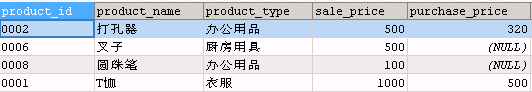  

思考: 如果不使用 UNION 该怎么写查询语句?

### 4.1.2.2UNION 与 OR 谓词
对于上边的练习题, 如果你已经正确地写出来查询, 你会发现, 使用 UNION 对两个查询结果取并集, 和在一个查询中使用 WHERE 子句, 然后使用 OR 谓词连接两个查询条件, 能够得到相同的结果.  

那么是不是就没必要引入 UNION 了呢? 当然不是这样的. 确实, 对于同一个表的两个不同的筛选结果集, 使用 UNION 对两个结果集取并集, 和把两个子查询的筛选条件用 OR 谓词连接, 会得到相同的结果, 但倘若要将两个不同的表中的结果合并在一起, 就不得不使用 UNION 了.  

而且, 即便是对于同一张表, 有时也会出于查询效率方面的因素来使用 UNION.  

**练习题:**  

分别使用 UNION 或者 OR 谓词,找出毛利率不足 30%或毛利率未知的商品.   

### 4.1.2.3 包含重复行的集合运算 UNION ALL
在1.1.1 中我们发现, SQL 语句的 UNION 会对两个查询的结果集进行合并和去重, 这种去重不仅会去掉两个结果集相互重复的, 还会去掉一个结果集中的重复行. 但在实践中有时候需要需要不去重的并集, 在 UNION 的结果中保留重复行的语法其实非常简单,只需要在 UNION 后面添加 ALL 关键字就可以了.  

例如, 想要知道 product 和 product2 中所包含的商品种类及每种商品的数量, 第一步,就需要将两个表的商品种类字段选出来, 然后使用 UNION ALL 进行不去重地合并. 接下来再对两个表的结果按 product_type 字段分组计数.  

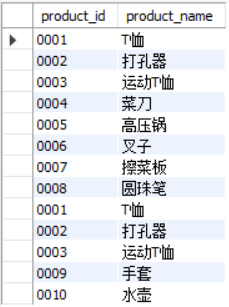

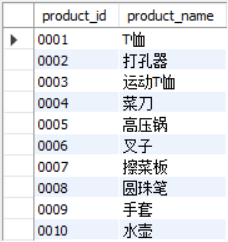

### 4.1.2.4[扩展阅读]bag 模型与 set 模型
在高中数学课上我们就学过, 集合的一个显著的特征就是集合中的元素都是互异的. 当我们把数据库中的表看作是集合的时候, 实际上存在一些问题的: 不论是有意的设计或无意的过失, 很多数据库中的表包含了重复的行.  

Bag 是和 set 类似的一种数学结构, 不一样的地方在于: bag 里面允许存在重复元素, 如果同一个元素被加入多次, 则袋子里就有多个该元素.  

通过上述 bag 与 set 定义之间的差别我们就发现, 使用 bag 模型来描述数据库中的表在很多时候更加合适.  

是否允许元素重复导致了 set 和 bag 的并交差等运算都存在一些区别. 以 bag 的交为例, 由于 bag 允许元素重复出现, 对于两个 bag, 他们的并运算会按照: **1.该元素是否至少在一个 bag 里出现过, 2.该元素在两个 bag 中的最大出现次数** 这两个方面来进行计算. 因此对于 A = {1,1,1,2,3,5,7}, B = {1,1,2,2,4,6,8} 两个 bag, 它们的并就等于 {1,1,1,2,2,3,4,5,6,7,8}.  

### 4.1.2.5隐式类型转换
通常来说, 我们会把类型完全一致, 并且代表相同属性的列使用 UNION 合并到一起显示, 但有时候, 即使数据类型不完全相同, 也会通过隐式类型转换来将两个类型不同的列放在一列里显示, 例如字符串和数值类型:  

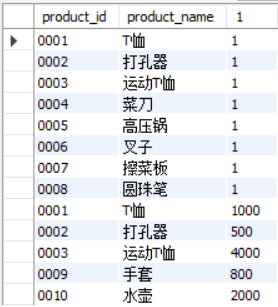

**练习题:**  

使用 SYSDATE()函数可以返回当前日期时间, 是一个日期时间类型的数据, 试测试该数据类型和数值,字符串等类型的兼容性.  

例如, 以下代码可以正确执行, 说明时间日期类型和**字符串**,**数值**以及**缺失值**均能兼容.  

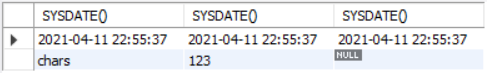

## 4.1.3 MySQL 8.0 不支持交运算INTERSECT
集合的交, 就是两个集合的公共部分, 由于集合元素的互异性, 集合的交只需通过文氏图就可以很直观地看到它的意义.  

虽然集合的交运算在SQL标准中已经出现多年了, 然而很遗憾的是, 截止到 MySQL 8.0 版本, MySQL 仍然不支持 INTERSECT 操作.  

### 4.1.3.1INTERSECT 与 AND 谓词
对于同一个表的两个查询结果而言, 他们的交INTERSECT实际上可以等价地将两个查询的检索条件用AND谓词连接来实现.  

**练习题:**  

使用AND谓词查找product表中利润率高于50%,并且售价低于1500的商品,查询结果如下所示.  
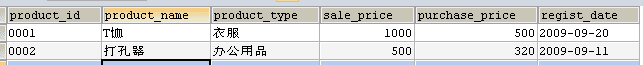  

### 4.1.3.2[扩展阅读]bag 的交运算
对于两个 bag, 他们的交运算会按照: **1.该元素是否同时属于两个 bag, 2.该元素在两个 bag 中的最小出现次数** 这两个方面来进行计算. 因此对于 A = {1,1,1,2,3,5,7}, B = {1,1,2,2,4,6,8} 两个 bag, 它们的交运算结果就等于 {1,1,2}.  

## 4.1.4 差集,补集与表的减法
求集合差集的减法运算和实数的减法运算有些不同, 当使用一个集合A减去另一个集合B的时候,对于只存在于集合B而不存在于集合A的元素, 采取直接忽略的策略,因此集合A和B做减法只是将集合A中也同时属于集合B的元素减掉。  
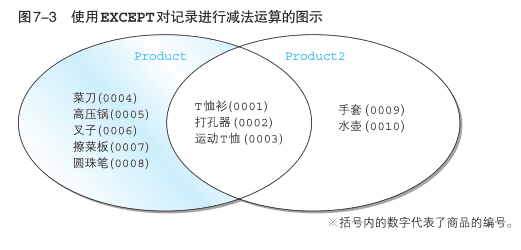
### 4.1.4.1 MySQL 8.0 还不支持 EXCEPT 运算
MySQL 8.0 还不支持 表的减法运算符 EXCEPT. 不过, 借助第六章学过的NOT IN 谓词, 我们同样可以实现表的减法.  

**练习题:**  

找出只存在于product表但不存在于product2表的商品.  

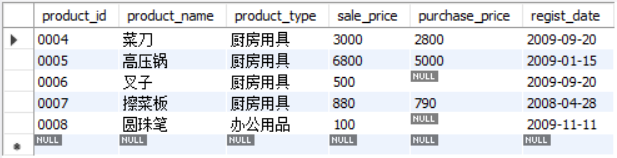

### 4.1.4.2 EXCEPT 与 NOT 谓词 
通过上述练习题的MySQL解法, 我们发现, 使用 NOT IN 谓词, 基本上可以实现和SQL标准语法中的EXCEPT运算相同的效果.  

**练习题:**  

使用NOT谓词进行集合的减法运算, 求出product表中, 售价高于2000,但利润低于30%的商品, 结果应该如下表所示.  
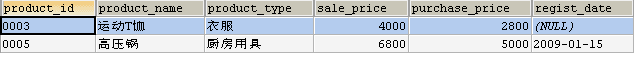!

### 4.1.4.3EXCEPT ALL 与bag 的差
类似于UNION ALL, EXCEPT ALL 也是按出现次数进行减法, 也是使用bag模型进行运算.  

对于两个 bag, 他们的差运算会按照:    

**1.该元素是否属于作为被减数的 bag**  

**2.该元素在两个 bag 中的出现次数之差**  

这两个方面来进行计算. 只有属于被减数的bag的元素才参与EXCEP ALL运算, 并且差bag中的次数,等于该元素在两个bag的出现次数之差(差为零或负数则不出现). 因此对于 A = {1,1,1,2,3,5,7}, B = {1,1,2,2,4,6,8} 两个 bag, 它们的差就等于 {1,3,5,7}.  

## 4.1.5对称差  
两个集合A,B的对称差是指那些仅属于A或仅属于B的元素构成的集合. 对称差也是个非常基础的运算, 例如, 两个集合的交就可以看作是两个集合的并去掉两个集合的对称差.上述方法在其他数据库里也可以用来简单地实现表或查询结果的对称差运算: 首先使用UNION求两个表的并集, 然后使用INTERSECT求两个表的交集, 然后用并集减去交集, 就得到了对称差.  

但由于在MySQL 8.0 里, 由于两个表或查询结果的并不能直接求出来, 因此并不适合使用上述思路来求对称差. 好在还有差集运算可以使用. 从直观上就能看出来, 两个集合的对称差等于 A-B并上B-A, 因此实践中可以用这个思路来求对称差.  

**练习题:**  

使用product表和product2表的对称差来查询哪些商品只在其中一张表, 结果类似于:  
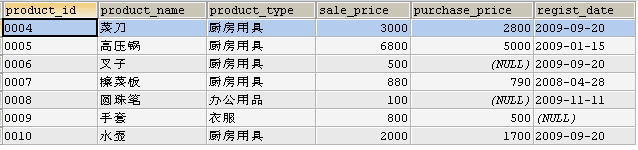

### 4.1.5.1借助并集和差集迂回实现交集运算 INTERSECT
通过观察集合运算的文氏图, 我们发现, 两个集合的交可以看作是两个集合的并去掉两个集合的对称差。



# 4.2连结(JOIN)

前一节我们学习了 UNION和INTERSECT 等集合运算, **这些集合运算的特征就是以行方向为单位进行操作** . 通俗地说, 就是进行这些集合运算时, **会导致记录行数的增减** . 使用 UNION 会增加记录行数,而使用 INTERSECT 或者 EXCEPT 会减少记录行数.

但这些运算不能改变列的变化, 虽然使用函数或者 CASE表达式等列运算, 可以增加列的数量, 但仍然只能从一张表中提供的基础信息列中获得一些"引申列", 本质上并不能提供更多的信息. 如果想要从多个表获取信息, 例如, 如果我们想要找出某个商店里的衣服类商品的名称,数量及价格等信息, 则必须分别从shopproduct 表和product 表获取信息.
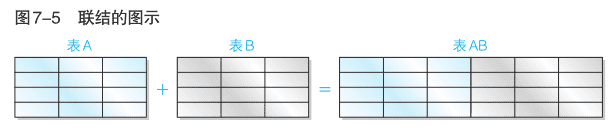
> 注:
截至目前,本书中出现的示例(除了关联子查询)基本上都是从一张表中选取数据,但实际上,期望得到的数据往往会分散在不同的表之中, 这时候就需要使用连结了.之前在学习关联子查询时我们发现, 使用关联子查询也可以从其他表获取信息, 但连结更适合从多张表获取信息.

连结(JOIN)就是使用某种关联条件(一般是使用相等判断谓词"="), 将其他表中的列添加过来, 进行“添加列”的集合运算. 可以说,连结是 SQL 查询的核心操作, 掌握了连结, 能够从两张甚至多张表中获取列, 能够将过去使用关联子查询等过于复杂的查询简化为更加易读的形式, 以及进行一些更加复杂的查询.

SQL 中的连结有多种分类方法, 我们这里使用最基础的内连结和外连结的分类方法来分别进行讲解.

## 4.2.1 内连结(INNER JOIN)
内连结的语法格式是:

其中 INNER 关键词表示使用了内连结, 至于内连结的涵义, 目前暂时可以不必细究.
例如, 还是刚才那个问题:

找出某个商店里的衣服类商品的名称,数量及价格等信息.

我们进一步把这个问题明确化:

找出东京商店里的衣服类商品的商品名称,商品价格,商品种类,商品数量信息.

### 4.2.1.1 使用内连结从两个表获取信息  
我们先来分别观察所涉及的表,product 表保存了商品编号,商品名称,商品种类等信息,这个表可以提供关于衣服种类的衣服的详细信息, 但是不能提供商店信息.  
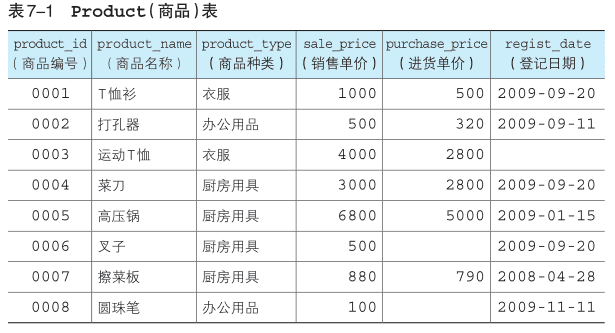  
我们接下来观察shopproduct 表, 这个表里有商店编号名称,商店的商品编号及数量. 但要想获取商品的种类及名称售价等信息,则必须借助于product 表.   
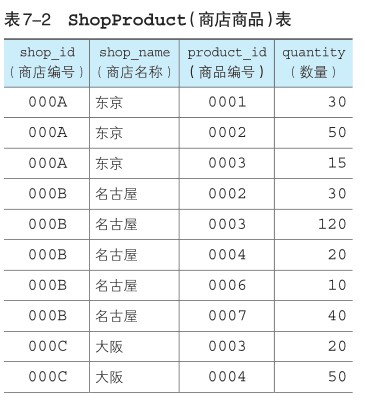  
所以问题的关键是, 找出一个类似于"轴"或者"桥梁"的公共列, 将两张表用这个列连结起来. 这就是连结运算所要作的事情.  

我们来对比一下上述两张表, 可以发现, 商品编号列是一个公共列, 因此很自然的事情就是用这个商品编号列来作为连接的“桥梁”，将product和shopproduct这两张表连接起来。  
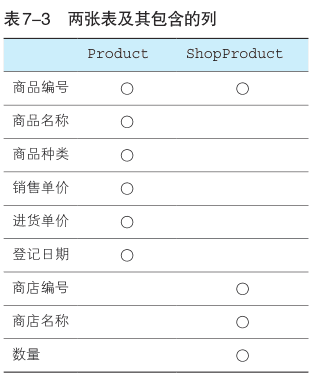  

> 注:
如果你使用过 excel 的 vlookup 函数, 你会发现这个函数正好也能够实现这个功能. 实际上, 在思路上, 关联子查询更像是 vlookup 函数: 以表 A 为主表, 然后根据表 A 的关联列的每一行的取值,逐个到表 B 中的关联列中去查找取值相等的行.
当数据量较少时, 这种方式并不会有什么性能问题, 但数据量较大时, 这种方式将会导致较大的计算开销: 对于外部查询返回的每一行数据, 都会向内部的子查询传递一个关联列的值, 然后内部子查询根据传入的值执行一次查询然后返回它的查询结果. 这就使得, 例如外部主查询的返回结果有一万行, 那么子查询就会执行一万次, 这将会带来非常恐怖的时间消耗.  
 
我们把上述问题进行分解:  

首先, 找出每个商店的商店编号, 商店名称, 商品编号, 商品名称, 商品类别, 商品售价,商品数量信息.  

按照内连结的语法, 在 FROM 子句中使用 INNER JOIN 将两张表连接起来, 并为 ON 子句指定连结条件为 shopproduct.product_id=product.product_id, 就得到了如下的查询语句:  

在上述查询中, 我们分别为两张表指定了简单的别名, 这种操作在使用连结时是非常常见的, 通过别名会让我们在编写查询时少打很多字, 并且更重要的是, 会让查询语句看起来更加简洁.  
上述查询将会得到如下的结果:  
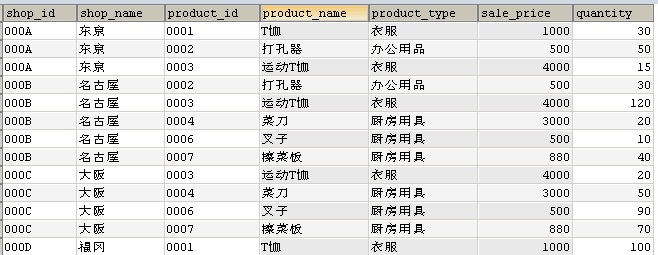  
观察查询结果, 我们看到,这个结果里的列已经包含了所有我们需要的信息.  

关于内连结,需要注意以下三点:  
 
**要点一: 进行连结时需要在 FROM 子句中使用多张表.**  

之前的 FROM 子句中只有一张表, 而这次我们同时使用了shopproduct 和product 两张表,使用关键字 INNER JOIN 就可以将两张表连结在一起了:  

**要点二:必须使用 ON 子句来指定连结条件.**  

在进行内连结时 ON 子句是必不可少的(大家可以试试去掉上述查询的 ON 子句后会有什么结果).  

ON 子句是专门用来指定连结条件的, 我们在上述查询的 ON 之后指定两张表连结所使用的列以及比较条件, 基本上, 它能起到与 WHERE 相同的筛选作用, 我们会在本章的结尾部分进一步探讨这个话题.  

**要点三: SELECT 子句中的列最好按照 表名.列名 的格式来使用.**  

当两张表的列除了用于关联的列之外, 没有名称相同的列的时候, 也可以不写表名, 但表名使得我们能够在今后的任何时间阅读查询代码的时候, 都能马上看出每一列来自于哪张表, 能够节省我们很多时间.  

但是, 如果两张表有其他名称相同的列, 则必须使用上述格式来选择列名, 否则查询语句会报错.  

我们回到上述查询所回答的问题. 通过观察上述查询的结果, 我们发现, 这个结果离我们的目标: 找出东京商店的衣服类商品的基础信息已经很接近了. 接下来,我们只需要把这个查询结果作为一张表, 给它增加一个 WHERE 子句来指定筛选条件.  

### 4.2.1.2 结合 WHERE 子句使用内连结
如果需要在使用内连结的时候同时使用 WHERE 子句对检索结果进行筛选, 则需要把 WHERE 子句写在 ON 子句的后边.  
 
例如, 对于上述查询问题, 我们可以在前一步查询的基础上, 增加 WHERE 条件.  

增加 WHERE 子句的方式有好几种,我们先从最简单的说起.  

第一种增加 WEHRE 子句的方式, 就是把上述查询作为子查询, 用括号封装起来, 然后在外层查询增加筛选条件.  

还记得我们学习子查询时的认识吗? 子查询的结果其实也是一张表,只不过是一张虚拟的表, 它并不真实存在于数据库中, 只是数据库中其他表经过筛选,聚合等查询操作后得到的一个"视图".  
这种写法能很清晰地分辨出每一个操作步骤, 在我们还不十分熟悉 SQL 查询每一个子句的执行顺序的时候可以帮到我们.  

但实际上, 如果我们熟知 WHERE 子句将在 FROM 子句之后执行, 也就是说, 在做完 INNER JOIN … ON 得到一个新表后, 才会执行 WHERE 子句, 那么就得到标准的写法:  

我们首先给出上述查询的执行顺序:  
FROM 子句->WHERE 子句->SELECT 子句  

也就是说, 两张表是先按照连结列进行了连结, 得到了一张新表, 然后 WHERE 子句对这张新表的行按照两个条件进行了筛选, 最后, SELECT 子句选出了那些我们需要的列.  

此外, 一种不是很常见的做法是,还可以将 WHERE 子句中的条件直接添加在 ON 子句中, 这时候 ON 子句后最好用括号将连结条件和筛选条件括起来.  

但上述这种把筛选条件和连结条件都放在 ON 子句的写法, 不是太容易阅读, 不建议大家使用.  
另外, 先连结再筛选的标准写法的执行顺序是, 两张完整的表做了连结之后再做筛选,如果要连结多张表, 或者需要做的筛选比较复杂时, 在写 SQL 查询时会感觉比较吃力. 在结合 WHERE 子句使用内连结的时候, 我们也可以更改任务顺序, 并采用任务分解的方法,先分别在两个表使用 WHERE 进行筛选,然后把上述两个子查询连结起来.  

先分别在两张表里做筛选, 把复杂的筛选条件按表分拆, 然后把筛选结果(作为表)连接起来, 避免了写复杂的筛选条件, 因此这种看似复杂的写法, 实际上整体的逻辑反而非常清晰. 在写查询的过程中, 首先要按照最便于自己理解的方式来写, 先把问题解决了, 再思考优化的问题.

**练习题:**  

找出每个商店里的衣服类商品的名称及价格等信息. 希望得到如下结果:  
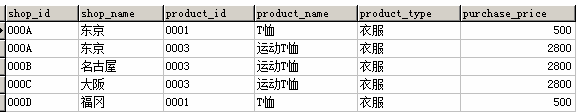

上述第二种写法虽然包含了子查询, 并且代码行数更多, 但由于每一层的目的很明确, 更适于阅读, 并且在外连结的情形下, 还能避免错误使用 WHERE 子句导致外连结失效的问题, 相关示例见后文中的"结合 WHERE 子句使用外连结"章节.

**练习题:**  

分别使用连结两个子查询和不使用子查询的方式, 找出东京商店里, 售价低于 2000 的商品信息,希望得到如下结果.  
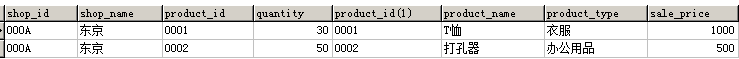

#### 4.2.1.3结合 GROUP BY 子句使用内连结  
结合 GROUP BY 子句使用内连结, 需要根据分组列位于哪个表区别对待.  

最简单的情形, 是在内连结之前就使用 GROUP BY 子句.  

但是如果分组列和被聚合的列不在同一张表, 且二者都未被用于连结两张表, 则只能先连结, 再聚合.  

**练习题:**  

每个商店中, 售价最高的商品的售价分别是多少? 
> 注: 这道题的一个简易的方式是使用下一章的窗口函数. 当然, 也可以使用其他我们已经学过的知识来实现, 例如, 在找出每个商店售价最高商品的价格后, 使用这个价格再与product 列进行连结, 但这种做法在价格不唯一时会出现问题.

### 4.2.1.4自连结(SELF JOIN)
之前的内连结, 连结的都是不一样的两个表. 但实际上一张表也可以与自身作连结, 这种连接称之为自连结. 需要注意, 自连结并不是区分于内连结和外连结的第三种连结, 自连结可以是外连结也可以是内连结, 它是不同于内连结外连结的另一个连结的分类方法.  

### 4.2.1.5内连结与关联子查询
回忆第五章第三节关联子查询中的问题: 找出每个商品种类当中售价高于该类商品的平均售价的商品.当时我们是使用关联子查询来实现的.  

使用内连结同样可以解决这个问题:  
首先, 使用 GROUP BY 按商品类别分类计算每类商品的平均价格.  

接下来, 将上述查询与表 product 按照 product_type (商品种类)进行内连结.

最后, 增加 WHERE 子句, 找出那些售价高于该类商品平均价格的商品.完整的代码如下:

仅仅从代码量上来看, 上述方法似乎比关联子查询更加复杂, 但这并不意味着这些代码更难理解. 通过上述分析, 很容易发现上述代码的逻辑实际上更符合我们的思路, 因此尽管看起来复杂, 但思路实际上更加清晰.  
作为对比, 试分析如下代码:

虽然去掉了子查询,查询语句的层次更少, 而且代码行数似乎更少, 但实际上这个方法可能更加难以写出来. 在实践中, 一定要按照易于让自己理解的思路去分层次写代码, 而不要花费很长世间写出一个效率可能更高但自己和他人理解起来难度更高的代码.

### 4.2.1.6自然连结(NATURAL JOIN)
自然连结并不是区别于内连结和外连结的第三种连结, 它其实是内连结的一种特例–当两个表进行自然连结时, 会按照两个表中都包含的列名来进行等值内连结, 此时无需使用 ON 来指定连接条件.  

上述查询得到的结果, 会把两个表的公共列(这里是 product_id, 可以有多个公共列)放在第一列, 然后按照两个表的顺序和表中列的顺序, 将两个表中的其他列都罗列出来.  
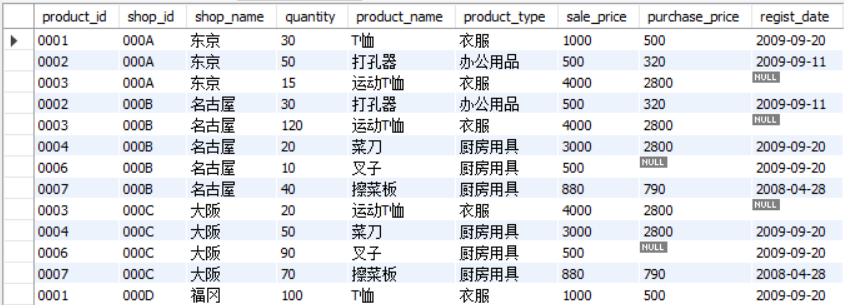

**练习题:**  
试写出与上述自然连结等价的内连结.  

使用自然连结还可以求出两张表或子查询的公共部分, 例如教材中 7-1 选取表中公共部分–INTERSECT 一节中的问题: 求表 product 和表 product2 中的公共部分, 也可以用自然连结来实现:  
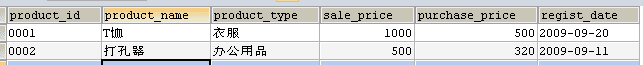  
这个结果和书上给的结果并不一致, 少了运动 T 恤, 这是由于运动 T 恤的 regist_date 字段为空, 在进行自然连结时, 来自于 product 和 product2 的运动 T 恤这一行数据在进行比较时, 实际上是在逐字段进行等值连结, 回忆我们在 6.2ISNULL,IS NOT NULL 这一节学到的缺失值的比较方法就可得知, 两个缺失值用等号进行比较, 结果不为真. 而连结只会返回对连结条件返回为真的那些行.  

如果我们将查询语句进行修改:  

那就可以得到正确的结果了:  
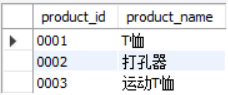

### 4.2.1.7使用连结求交集
我们在上一节表的加减法里知道, MySQL 8.0 里没有交集运算, 我们当时是通过并集和差集来实现求交集的. 现在学了连结, 让我们试试使用连结来实现求交集的运算.  

**练习题:**   
使用内连结求product 表和product2 表的交集.  

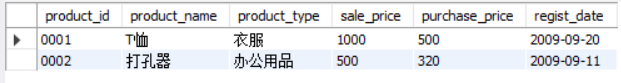

注意上述结果和 P230 的结果并不一致–少了 product_id='0001'这一行, 观察源表数据可发现, 少的这行数据的 regist_date 为缺失值, 回忆第六章讲到的 IS NULL 谓词, 我们得知, 这是由于缺失值是不能用等号进行比较导致的.  

如果我们仅仅用 product_id 来进行连结:  

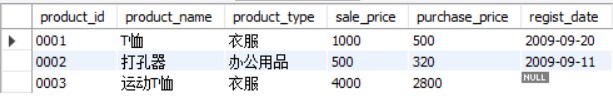  
这次就一致了.

## 4.2.2 外连结(OUTER JOIN)
内连结会丢弃两张表中不满足 ON 条件的行,和内连结相对的就是外连结. 外连结会根据外连结的种类有选择地保留无法匹配到的行.  

按照保留的行位于哪张表,外连结有三种形式: 左连结, 右连结和全外连结.  

左连结会保存左表中无法按照 ON 子句匹配到的行, 此时对应右表的行均为缺失值; 右连结则会保存右表中无法按照 ON 子句匹配到的行, 此时对应左表的行均为缺失值; 而全外连结则会同时保存两个表中无法按照 ON子句匹配到的行, 相应的另一张表中的行用缺失值填充.  

三种外连结的对应语法分别为:  

### 4.2.2.1 左连结与右连接
由于连结时可以交换左表和右表的位置, 因此左连结和右连结并没有本质区别.接下来我们先以左连结为例进行学习. 所有的内容在调换两个表的前后位置, 并将左连结改为右连结之后, 都能得到相同的结果. 稍后再介绍全外连结的概念.  

### 4.2.2.2 使用左连结从两个表获取信息
如果你仔细观察过将shopproduct 和product 进行内连结前后的结果的话, 你就会发现,product 表中有两种商品并未在内连结的结果里, 就是说, 这两种商品并未在任何商店有售(这通常意味着比较重要的业务信息, 例如, 这两种商品在所有商店都处于缺货状态, 需要及时补货). 现在, 让我们先把之前内连结的 SELECT 语句转换为左连结试试看吧.  

**练习题:**    
统计每种商品分别在哪些商店有售, 需要包括那些在每个商店都没货的商品.  

使用左连结的代码如下(注意区别于书上的右连结):  

上述查询得到的检索结果如下(由于并未使用 ORDER BY 子句指定顺序,你执行上述代码得到的结果可能顺序与下图不同):  
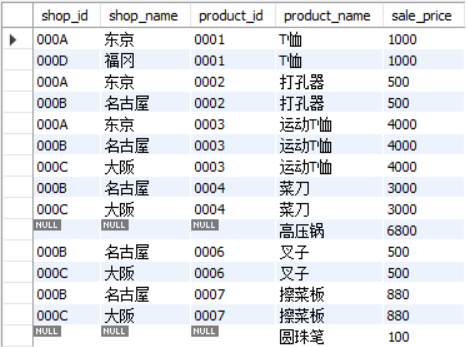  
我们观察上述结果可以发现, 有两种商品: 高压锅和圆珠笔, 在所有商店都没有销售. 由于我们在 SELECT 子句选择列的显示顺序以及未对结果进行排序的原因, 这个事实需要你仔细地进行观察.  

**外连结要点 1: 选取出单张表中全部的信息**  
与内连结的结果相比,不同点显而易见,那就是结果的行数不一样.内连结的结果中有 13 条记录,而外连结的结果中有 15 条记录,增加的 2 条记录到底是什么呢?这正是外连结的关键点. 多出的 2 条记录是高压锅和圆珠笔,这 2 条记录在shopproduct 表中并不存在,也就是说,这 2 种商品在任何商店中都没有销售.由于内连结只能选取出同时存在于两张表中的数据,因此只在product 表中存在的 2 种商品并没有出现在结果之中.相反,对于外连结来说,只要数据存在于某一张表当中,就能够读取出来.在实际的业务中,例如想要生成固定行数的单据时,就需要使用外连结.如果使用内连结的话,根据 SELECT 语句执行时商店库存状况的不同,结果的行数也会发生改变,生成的单据的版式也会受到影响,**而使用外连结能够得到固定行数的结果**.虽说如此,那些表中不存在的信息我们还是无法得到,结果中高压锅和圆珠笔的商店编号和商店名称都是 NULL （具体信息大家都不知道,真是无可奈何）.外连结名称的由来也跟 NULL 有关,即“结果中包含原表中不存在（在原表之外）的信息”.相反,只包含表内信息的连结也就被称为内连结了.  

**外连结要点 2:使用 LEFT、RIGHT 来指定主表**  
外连结还有一点非常重要,那就是要把哪张表作为主表.最终的结果中会包含主表内所有的数据.指定主表的关键字是 LEFT 和 RIGHT.顾名思义,使用 LEFT 时 FROM 子句中写在左侧的表是主表,使用 RIGHT 时右侧的表是主表.代码清单 7-11 中使用了 RIGHT ,因此,右侧的表,也就是product 表是主表.我们还可以像代码清单 7-12 这样进行改写,意思完全相同.这样你可能会困惑，到底应该使用 LEFT 还是 RIGHT？其实它们的功能没有任何区别,使用哪一个都可以.通常使用 LEFT 的情况会多一些,但也并没有非使用这个不可的理由,使用 RIGHT 也没有问题.  

通过交换两个表的顺序, 同时将 LEFT 更换为 RIGHT(如果原先是 RIGHT,则更换为 LEFT), 两种方式会到完全相同的结果.  

### 4.2.2.3结合 WHERE 子句使用左连结
上一小节我们学到了外连结的基础用法, 并且在上一节也学习了结合WHERE子句使用内连结的方法, 但在结合WHERE子句使用外连结时, 由于外连结的结果很可能与内连结的结果不一样, 会包含那些主表中无法匹配到的行, 并用缺失值填写另一表中的列, 由于这些行的存在, 因此在外连结时使用WHERE子句, 情况会有些不一样. 我们来看一个例子:  

**练习题:**  

使用外连结从shopproduct表和product表中找出那些在某个商店库存少于50的商品及对应的商店.希望得到如下结果.  
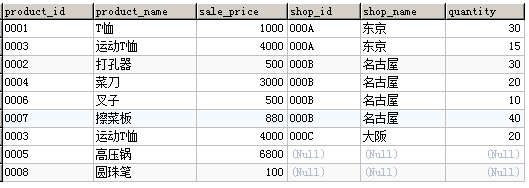  
注意高压锅和圆珠笔两种商品在所有商店都无货, 所以也应该包括在内.   

按照"结合WHERE子句使用内连结"的思路, 我们很自然会写出如下代码  

然而不幸的是, 得到的却是如下的结果:  
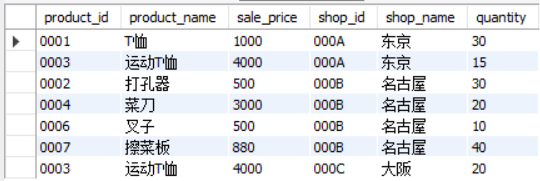  
观察发现,返回结果缺少了在所有商店都无货的高压锅和圆珠笔。聪明的你可能很容易想到，在WHERE过滤条件中增加``OR quantity IS NULL``的判断条件，便可以得到预期结果。然而在实际环境中，由于数据量大且数据质量并非像我们设想的那样"干净"，我们并不能容易地意识到缺失值等问题数据的存在，因此，还是让我们想一下如何改写我们的查询以使得它能够适应更复杂的真实数据的情形吧。

联系到我们已经掌握了的SQL查询的执行顺序(FROM->WHERE->SELECT),我们发现, 问题可能出在筛选条件上, 因为在进行完外连结后才会执行WHERE子句, 因此那些主表中无法被匹配到的行就被WHERE条件筛选掉了。

明白了这一点, 我们就可以试着把WHERE子句挪到外连结之前进行: 先写个子查询,用来从shopproduct表中筛选quantity<50的商品, 然后再把这个子查询和主表连结起来。

我们把上述思路写成SQL查询语句:

得到的结果如下:  
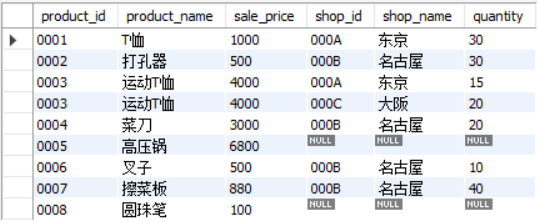

### 4.2.2.4在 MySQL 中实现全外连结
有了对左连结和右连结的了解, 就不难理解全外连结的含义了. 全外连结本质上就是对左表和右表的所有行都予以保留, 能用 ON 关联到的就把左表和右表的内容在一行内显示, 不能被关联到的就分别显示, 然后把多余的列用缺失值填充。  

遗憾的是, MySQL8.0 目前还不支持全外连结, 不过我们可以对左连结和右连结的结果进行 UNION 来实现全外连结。  

## 4.2.3多表连结
通常连结只涉及 2 张表,但有时也会出现必须同时连结 3 张以上的表的情况, 原则上连结表的数量并没有限制。  

### 4.2.3.1 多表进行内连结
首先创建一个用于三表连结的表 Inventoryproduct.首先我们创建一张用来管理库存商品的表, 假设商品都保存在 P001 和 P002 这 2 个仓库之中.  
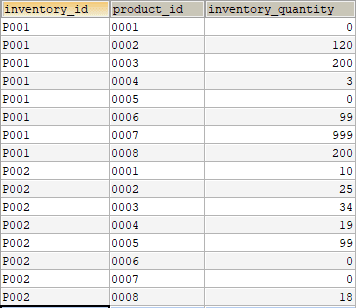  
建表语句如下:

然后插入一些数据:

接下来, 我们根据上表及shopproduct 表和product 表, 使用内连接找出每个商店都有那些商品, 每种商品的库存总量分别是多少.

得到如下结果  
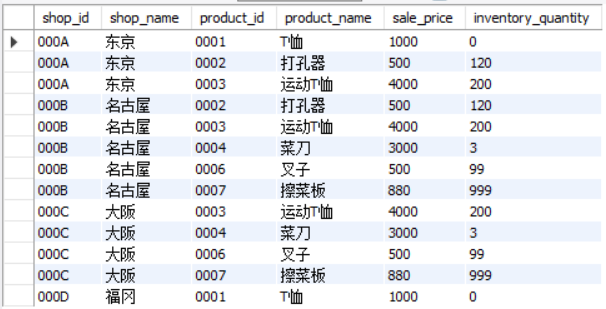  
我们可以看到, 连结第三张表的时候, 也是通过 ON 子句指定连结条件(这里使用最基础的等号将作为连结条件的product 表和shopproduct 表中的商品编号 product _id 连结了起来), 由于product 表和shopproduct 表已经进行了连结,因此就无需再对product 表和 Inventoryproduct 表进行连结了(虽然也可以进行连结,但结果并不会发生改变, 因为本质上并没有增加新的限制条件).  

即使想要把连结的表增加到 4 张、5 张……使用 INNER JOIN 进行添加的方式也是完全相同的.  

### 4.2.3.2多表进行外连结
正如之前所学发现的, 外连结一般能比内连结有更多的行, 从而能够比内连结给出更多关于主表的信息, 多表连结的时候使用外连结也有同样的作用.  

例如,  

查询结果  
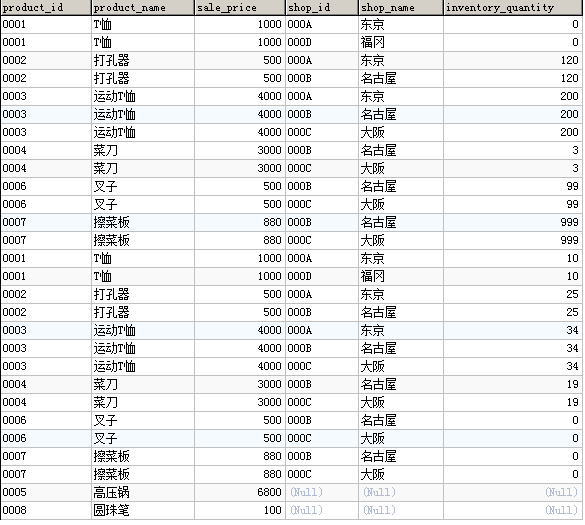

## 4.2.4 ON 子句进阶–非等值连结
在刚开始介绍连结的时候, 书上提到过, 除了使用相等判断的等值连结, 也可以使用比较运算符来进行连接. 实际上, 包括比较运算符(<,<=,>,>=, BETWEEN)和谓词运算(LIKE, IN, NOT 等等)在内的所有的逻辑运算都可以放在 ON 子句内作为连结条件.  

### 4.2.4.1非等值自左连结(SELF JOIN)  
使用非等值自左连结实现排名。  

**练习题:**  

希望对 product 表中的商品按照售价赋予排名. 一个从集合论出发,使用自左连结的思路是, 对每一种商品,找出售价不低于它的所有商品, 然后对售价不低于它的商品使用 COUNT 函数计数. 例如, 对于价格最高的商品,  

注 1: COUNT 函数的参数是列名时, 会忽略该列中的缺失值, 参数为 * 时则不忽略缺失值.  
注 2: 上述排名方案存在一些问题–如果两个商品的价格相等, 则会导致两个商品的排名错误, 例如, 叉子和打孔器的排名应该都是第六, 但上述查询导致二者排名都是第七. 试修改上述查询使得二者的排名均为第六.  
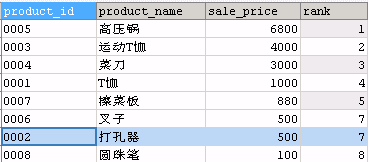  
注 3: 实际上, 进行排名有专门的函数, 这是 MySQL 8.0 新增加的窗口函数中的一种(窗口函数将在下一章学习), 但在较低版本的 MySQL 中只能使用上述自左连结的思路.  

使用非等值自左连结进行累计求和:  

**练习题:**

请按照商品的售价从低到高,对售价进行累计求和[注:这个案例缺少实际意义, 并且由于有两种商品价格相同导致了不必要的复杂度, 但示例数据库的表结构比较简单, 暂时未想出有实际意义的例题]

首先, 按照题意, 对每种商品使用自左连结, 找出比该商品售价价格更低或相等的商品

查询结果：  
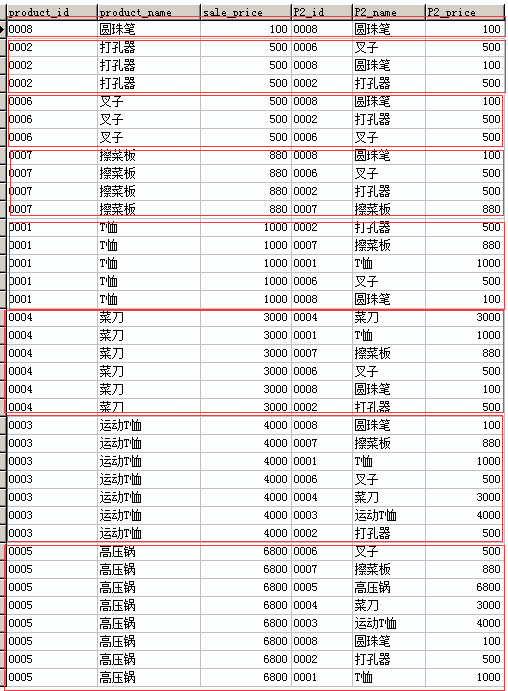  
看起来似乎没什么问题.  

下一步, 按照 P1.product_Id 分组,对 P2_price 求和:  

得到的查询结果为:  
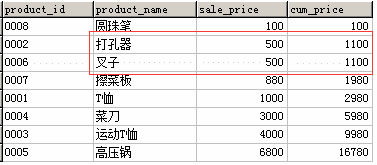  
观察上述查询结果发现, 由于有两种商品的售价相同, 在使用 >= 进行连结时, 导致了累计求和错误, 这是由于这两种商品售价相同导致的. 因此实际上之前是不应该单独只用 >= 作为连结条件的. 考察我们建立自左连结的本意, 是要找出满足:1.比该商品售价更低的, 或者是 2.该种商品自身,以及 3.如果 A 和 B 两种商品售价相等,则建立连结时, 如果 P1.A 和 P2.A,P2.B 建立了连接, 则 P1.B 不再和 P2.A 建立连结, 因此根据上述约束条件, 利用 ID 的有序性, 进一步将上述查询改写为:  

这次结果就正确了.  
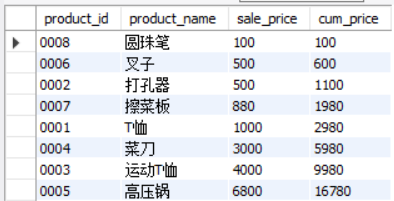

## 4.2.5 交叉连结—— CROSS JOIN(笛卡尔积)
之前的无论是外连结内连结, 一个共同的必备条件就是连结条件–ON 子句, 用来指定连结的条件. 如果你试过不使用这个连结条件的连结查询, 你可能已经发现, 结果会有很多行. **在连结去掉 ON 子句, 就是所谓的交叉连结(CROSS JOIN), 交叉连结又叫笛卡尔积**, 后者是一个数学术语. 两个集合做笛卡尔积, 就是使用集合 A 中的每一个元素与集合 B 中的每一个元素组成一个有序的组合. 数据库表(或者子查询)的并,交和差都是在纵向上对表进行扩张或筛选限制等运算的, 这要求表的列数及对应位置的列的数据类型"相容", 因此这些运算并不会增加新的列, 而交叉连接(笛卡尔积)则是在横向上对表进行扩张, 即增加新的列, 这一点和连结的功能是一致的. 但因为没有了ON子句的限制, 会对左表和右表的每一行进行组合, 这经常会导致很多无意义的行出现在检索结果中. 当然, 在某些查询需求中, 交叉连结也有一些用处.  

交叉连结的语法有如下几种形式:  

请大家试着执行一下以上语句.  
可能大家会惊讶于结果的行数, 但我们还是先来介绍一下语法结构吧.对满足相同规则的表进行交叉连结的集合运算符是 CROSS JOIN （笛卡儿积）.进行交叉连结时无法使用内连结和外连结中所使用的ON 子句,这是因为交叉连结是对两张表中的全部记录进行交叉组合,因此结果中的记录数通常是两张表中行数的乘积.本例中,因为shopproduct 表存在 13 条记录,product 表存在 8 条记录,所以结果中就包含了 13 × 8 = 104 条记录.  

可能这时会有读者想起前面我们提到过集合运算中的乘法会在本节中进行详细学习,这就是上面介绍的交叉连结.内连结是交叉连结的一部分,“内”也可以理解为“包含在交叉连结结果中的部分”.相反,外连结的“外”可以理解为“交叉连结结果之外的部分”.  

交叉连结没有应用到实际业务之中的原因有两个.一是其结果没有实用价值,二是由于其结果行数太多,需要花费大量的运算时间和高性能设备的支持.  

### 4.2.5.1[扩展阅读]连结与笛卡儿积的关系  
考察笛卡儿积和连结, 不难发现, 笛卡儿积可以视作一种特殊的连结(事实上笛卡儿积的语法也可以写作 CROSS JOIN), 这种连结的 ON 子句是一个恒为真的谓词.  

反过来思考, 在对笛卡儿积进行适当的限制之后, 也就得到了内连结和外连结.  

例如, 对于 shopproduct 表和 product 表, 首先建立笛卡尔乘积:  

查询结果的一部分如下:  
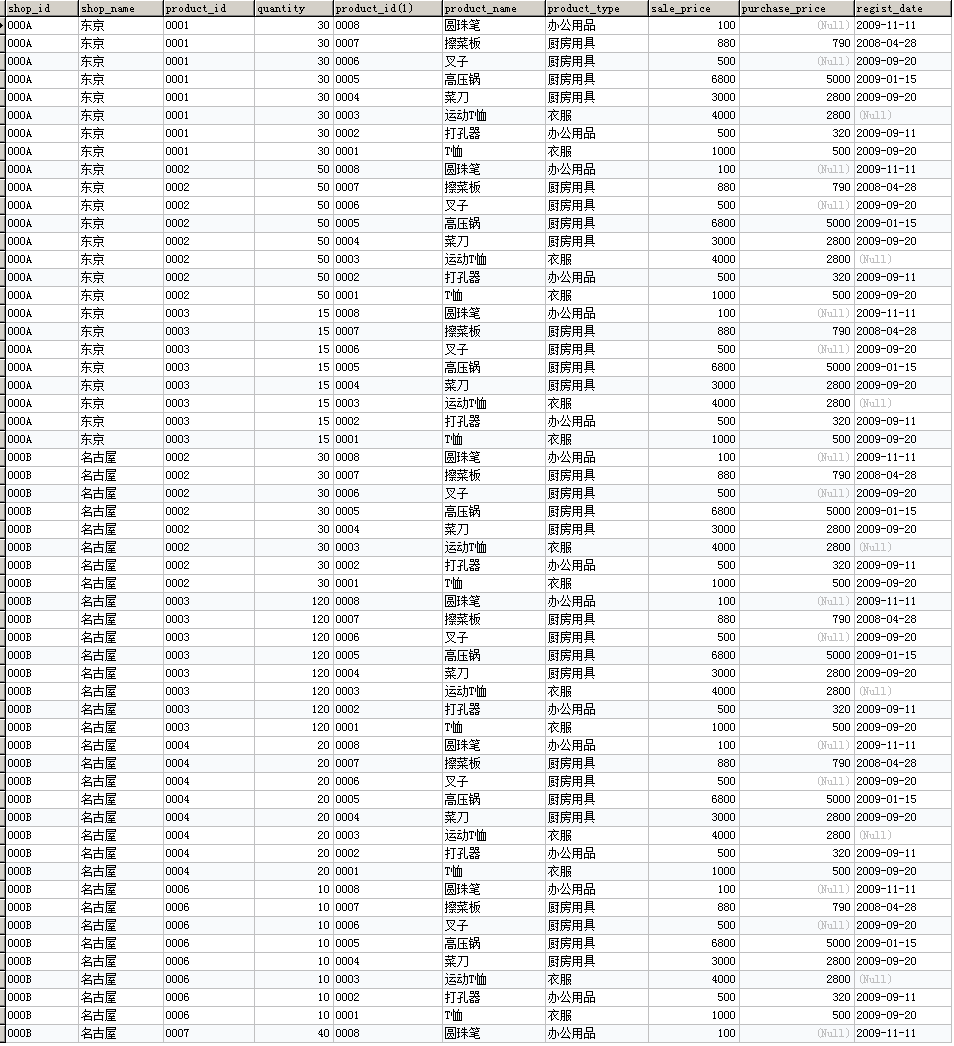  
然后对上述笛卡尔乘积增加筛选条件 SP.product_id=P.product_id, 就得到了和内连结一致的结果:  

查询结果如下:  
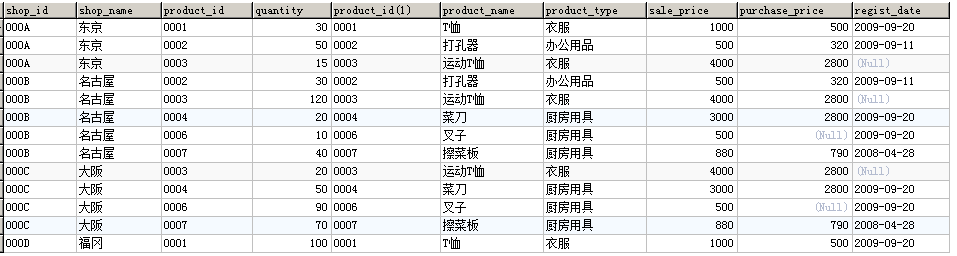  
实际上, 正如书中所说, 上述写法中, 将 CROSS JOIN 改为逗号后, 正是内连结的旧式写法, 但在 ANSI 和 ISO 的 SQL-92 标准中, 已经将使用 INNER JION …ON… 的写法规定为标准写法, 因此极力推荐大家在平时写 SQL 查询时, 使用规范写法.  

## 4.2.6 连结的特定语法和过时语法
在笛卡尔积的基础上, 我们增加一个 WHERE 子句, 将之前的连结条件作为筛选条件加进去, 我们会发现, 得到的结果恰好是直接使用内连接的结果.  

试执行以下查询, 并将查询结果与内连结一节第一个例子的结果做对比.  

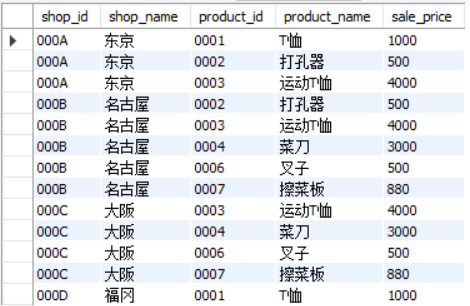  
我们发现, 这两个语句得到的结果是相同的.  
之前我们学习的内连结和外连结的语法都符合标准 SQL 的规定,可以在所有 DBMS 中执行,因此大家可以放心使用. 但是如果大家之后从事系统开发工作, 或者阅读遗留SQL 查询语句的话,一定会碰到需要阅读他人写的代码并进行维护的情况,而那些使用特定和过时语法的程序就会成为我们的麻烦.  

SQL 是一门特定语法及过时语法非常多的语言,虽然之前本书中也多次提及,但连结是其中特定语法的部分,现在还有不少年长的程序员和系统工程师仍在使用这些特定的语法.例如,将本节最初介绍的内连结的 SELECT 语句替换为过时语法的结果如下所示.  

使用过时语法的内连结（结果与代码清单 7-9 相同）  

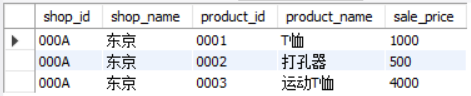  
这样的书写方式所得到的结果与标准语法完全相同,并且这样的语法可以在所有的 DBMS 中执行,并不能算是特定的语法,只是过时了而已.
但是,由于这样的语法不仅过时,而且还存在很多其他的问题,因此不推荐大家使用,理由主要有以下三点:

第一,使用这样的语法无法马上判断出到底是内连结还是外连结（又或者是其他种类的连结）.

第二,由于连结条件都写在 WHERE 子句之中,因此无法在短时间内分辨出哪部分是连结条件,哪部分是用来选取记录的限制条件.

第三,我们不知道这样的语法到底还能使用多久.每个 DBMS 的开发者都会考虑放弃过时的语法,转而支持新的语法.虽然并不是马上就不能使用了,但那一天总会到来的.

虽然这么说,但是现在使用这些过时语法编写的程序还有很多,到目前为止还都能正常执行.我想大家很可能会碰到这样的代码,因此还是希望大家能够了解这些知识.